# 手書き文字認識

　MNISTの手書き数字の画像をニューラルネットワークで認識させる

　　　　<img src="fig/mnist.png" width="50%">
　

## 計算モデル
- Softmax関数とは  
出力値があるカテゴリに分類される確率を表した関数

　　　　<img src="fig/softmax.png" width="50%">

## アルゴリズム　
- 総入力の値をaとして、カテゴリkに属する確率を求める、ソフトマックス関数は以下のように定義される。
$$
P_k=\frac{e^{a_k}}{\sum_{i=1}^N e^{a_i}}
$$


- 解を求めたい誤差関数Eは以下のように定義される。
$$
E=-\sum_{n=1}^N \sum_{k=1}^K t_{kn} \log P_k(x_n)
$$


## 実装
### データの読み込み

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train,y_train), (X_test, y_test) = mnist.load_data()


### データの調整

In [2]:
Y_train = to_categorical(y_train,10)  # One-hot化
Y_test = to_categorical(y_test,10)    # 答えの0から9を値として扱わないため。
X_train = X_train.reshape(-1,784)     # 2次元の画像を1次元のリストに変換(784 = 28 * 28)
X_test = X_test.reshape(-1,784)

### データの確認

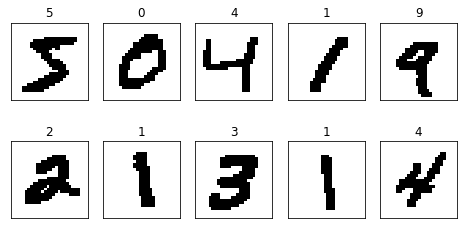

In [3]:
%matplotlib inline
fig = plt.figure(figsize=(8,4))
for c, (image, label) in enumerate(zip(X_train[:10], Y_train[:10])):
    subplot = fig.add_subplot(2,5,c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(label))
    subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation="nearest")

### 計算モデルの定義

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units=10, input_shape=(784,),activation='softmax'))

In [5]:
from tensorflow.keras.callbacks import TensorBoard

tsb = TensorBoard(log_dir='./mnist_log')
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

- TensorBoard
  - TensorBoardとはTensorFlowの計算グラフを可視化するツール
  - TensorFlowに同梱されている。
  - 基本的な使い方
    - Keras でコールバックとして設定する。
    - コマンドプロンプト(Windows)またはターミナル(MacOS)で以下のコマンドを入力  
    ％ tensorboard  --logdir=ログ出力ディレクトリ  
       Starting TensorBoard b'41' on port 6006  
       (You can navigate to http://xxx.xxx.xxx.xxx:6006)　　     <==== ブラウザでアクセス



### 計算実行

In [ ]:
history = model.fit(
    X_train,
    Y_train,
    epochs=200,
    batch_size=100,
    verbose=1,
    validation_split=0.2,
    callbacks=[tsb]
)

### テストデータで10件予測してみる

In [7]:
for i in range(10):
    predict = np.argmax(model.predict(X_test[i].reshape(1,-1)))
    actual = np.argmax(Y_test[i])
    print( predict, actual)

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
6 5
9 9


### テストデータ全体での評価

In [8]:

model.evaluate(X_test,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 4.6599 - accuracy: 0.8876


[4.659913063049316, 0.8876000046730042]

### 学習経過の確認

- Tensorboard で確認するか、
- 以下のスクリプトで確認

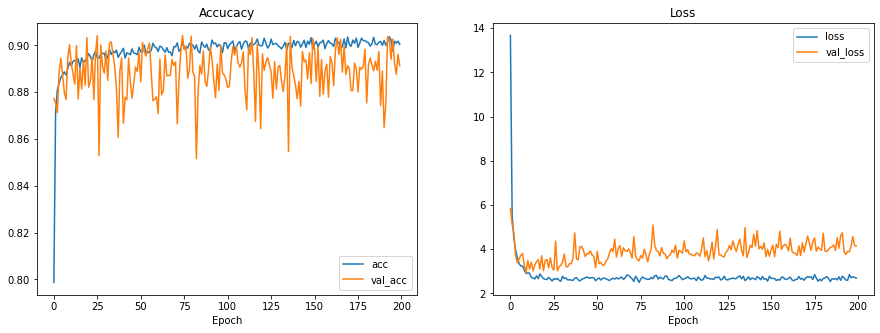

In [9]:
fig = plt.figure(figsize=[15, 5])

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Accucacy')
ax1.set_xlabel('Epoch')
ax1.plot(history.history['accuracy'], label='acc')
ax1.plot(history.history['val_accuracy'], label='val_acc')
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.plot(history.history['loss'], label='loss')
ax2.plot(history.history['val_loss'], label='val_loss')
ax2.legend()

plt.show()

